In [1]:
%matplotlib notebook

In [2]:
from scipy.stats import linregress
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

QUESTIONS

1. Popular varietals:
a) what regions produce highest quantity cabernet, merlot, blended varietals?
b) Of all the wines in the dataset, what is the most common/least common varietal in the top ten/or top 10% rated wines?
c) the least common varietal in the top 10/10% - does that make it more valuable because it is less common AND made it to the top?
2. BLENDS:
a) blends are said to be more complex and enhanced flavors - are blends frequently in the top rated wines? 
b) Is it more expensive to make blends because you have to experiment with combinations? 
c) does that make the wine itself more expensive? 
d. What regions produce the highest quantity of blends OR highest rated blends?

POSSIBLE DATA SET ISSUES

1. Who is using this ratings app?
a) For example, if it is not heavily used in one particular country, say France, are we getting an accurate picture of preference? Would a French person rate an wine from the United States lower because of bias?

In [37]:
wine_df = pd.read_csv('Wine_data.csv', encoding="ISO-8859-1")

# wine_df.head(20)



,Name,Rating,Winery,Area,Province,Country,Varietal,Vintage,Style,Wine Type,ID
3,Soul Shaker,89.506316,Ascension Cellars,Central Coast,CA,USA,"Cabernet Sauvignon, Petit Verdot, Syrah, Merlot",2012,NaN,Red,5564efe1b4f0c1030000009c
6,"Ascendance ""Melange""",88.939649,Ascension Cellars,Central Coast,CA,USA,"Cabernet Sauvignon, Merlot",2011,NaN,Red,5564efe1b4f0c10300000036
15,Ethereal,87.345964,Ascension Cellars,Central Coast,CA,USA,"Cabernet Sauvignon, Petite Verdot, Petite Sira...",2011,NaN,Red,5564efe1b4f0c1030000007a
17,Robert Mondavi Private Selection Cabernet Sauv...,87.343772,Robert Mondavi,"Acampo, California",NaN,USA,Cabernet Sauvignon,2017,NaN,Red,5e94ded55fd8fd7ae861d8e1
18,White Oak,87.335482,White Oak Vineyards,Napa Valley,NaN,USA,Cabernet Sauvignon,2012,NaN,Red,555397245840130300000031
...,...,...,...,...,...,...,...,...,...,...,...
12846,Paco Do Conde,62.128054,Herdade Paco Do Conde,Alentejano,NaN,Portugal,Aragonez Trincadeira Alicante Bouschet Caberne...,2011,NaN,Red,5407b7829874bd0200000009
12857,Tormaresca Neprica,61.418512,Tormaresca,Puglia,NaN,Italy,"Negroamaro, Primitivo, Cabernet Sauvignon",2012,NaN,Red,5508cea6036bae030000000c
12874,Soleus,59.935157,Montgras,Santiago,NaN,Chile,Cabernet Sauvignon,2012,NaN,Red,56060326d21c870300000026
12881,Buehler Estate Cabernet Sauvignon,58.641128,Buehler Vineyards,Napa Valley,NaN,USA,Cabernet Sauvignon,1997,NaN,Red,53ab01a0dab5f0020000000a


In [38]:
#Data Cleanup
wine_df['Country'] = wine_df['Country'].replace({'United States': 'USA', 'California': 'USA', 'Franc': 'France', 'French': 'France'})
cleaned_df = wine_df.loc[(wine_df['Country'] != 'Blind') & (wine_df['Country'] != 'Macedonia')]

cab = cleaned_df[cleaned_df["Varietal"].astype(str).str.contains("Cabernet Sauvignon",regex=False)]
cab

,Name,Rating,Winery,Area,Province,Country,Varietal,Vintage,Style,Wine Type,ID
3,Soul Shaker,89.506316,Ascension Cellars,Central Coast,CA,USA,"Cabernet Sauvignon, Petit Verdot, Syrah, Merlot",2012,NaN,Red,5564efe1b4f0c1030000009c
6,"Ascendance ""Melange""",88.939649,Ascension Cellars,Central Coast,CA,USA,"Cabernet Sauvignon, Merlot",2011,NaN,Red,5564efe1b4f0c10300000036
15,Ethereal,87.345964,Ascension Cellars,Central Coast,CA,USA,"Cabernet Sauvignon, Petite Verdot, Petite Sira...",2011,NaN,Red,5564efe1b4f0c1030000007a
17,Robert Mondavi Private Selection Cabernet Sauv...,87.343772,Robert Mondavi,"Acampo, California",NaN,USA,Cabernet Sauvignon,2017,NaN,Red,5e94ded55fd8fd7ae861d8e1
18,White Oak,87.335482,White Oak Vineyards,Napa Valley,NaN,USA,Cabernet Sauvignon,2012,NaN,Red,555397245840130300000031
...,...,...,...,...,...,...,...,...,...,...,...
12846,Paco Do Conde,62.128054,Herdade Paco Do Conde,Alentejano,NaN,Portugal,Aragonez Trincadeira Alicante Bouschet Caberne...,2011,NaN,Red,5407b7829874bd0200000009
12857,Tormaresca Neprica,61.418512,Tormaresca,Puglia,NaN,Italy,"Negroamaro, Primitivo, Cabernet Sauvignon",2012,NaN,Red,5508cea6036bae030000000c
12874,Soleus,59.935157,Montgras,Santiago,NaN,Chile,Cabernet Sauvignon,2012,NaN,Red,56060326d21c870300000026
12881,Buehler Estate Cabernet Sauvignon,58.641128,Buehler Vineyards,Napa Valley,NaN,USA,Cabernet Sauvignon,1997,NaN,Red,53ab01a0dab5f0020000000a


In [72]:
# Store Variables

# All varietals split from their commas in the cell
varietals_split = cleaned_df['Varietal'].astype(str).str.split(',\s+', expand=True).stack().value_counts()
varietals_split.head(50)
# varietals_split = varietals_split.reset_index(drop=False)
# varietals_split = varietals_split.rename(columns={"index":"Varietal","0":"Value Counts"})
# #varietals_split
# cab_split = cab[['Varietal']]
# merge = cab_split.merge(varietals_split, how="left", on="Varietal")
# merge
# merge_diff = cab_split.compare(varietals_split)
# # Count of varietals by country
# varietals_count = cleaned_df.groupby('Country').count()['Varietal']
# # print(varietals_count)

# # Count of wineries by country
# winery_count = cleaned_df.groupby('Country').count()['Winery']

# # Average rating of wines in each country
# wine_rating = cleaned_df.groupby('Country').mean()['Rating']



Cabernet Sauvignon    2027
Pinot Noir            1435
Merlot                1364
Chardonnay            1337
Syrah                 1106
Sauvignon Blanc        640
Cabernet Franc         627
Pinot Gris             566
Riesling               537
Malbec                 507
Grenache               459
Sangiovese             357
Zinfandel              311
Viognier               276
Tempranillo            255
Red Blend              248
Petit Verdot           243
Gewurztraminer         226
Mourvedre              186
nan                    183
Pinot Blanc            138
Nebbiolo               132
Petite Sirah           126
White Blend            116
Semillon               112
Chenin Blanc           106
Gamay                   99
Cinsault                95
Red Bordeaux Blend      88
Barbera                 84
Montepulciano           77
Carmenere               73
Carignan                69
Corvina                 69
Moscato                 61
Pinot Meunier           59
Glera                   58
R

In [6]:
# df options

# Count of wineries by country
winery_count_df = pd.DataFrame({'Winery Count': winery_count})

# Average rating of wines in each country
wine_rating_df = pd.DataFrame({'Wine Rating': wine_rating})

# Count of varietals by country
varietals_count_df = pd.DataFrame({'Varietals Count':varietals_count})
varietals_count_df

# Top Varietals (Varietals that appear most frequently in our dataset)
varietals_split_df = pd.DataFrame({'Top Varietals': varietals_split })
varietals_split_df

,Top Varietals
Cabernet Sauvignon,2027
Pinot Noir,1435
Merlot,1364
Chardonnay,1337
Syrah,1106
...,...
Pineau dâAunis,1
Rhone,1
Dona Blanca,1
Sparkling Rose 60% Pinot Nero and 40% Chardonnay,1


In [29]:
# Top 10 Options

# Variale for top 10 wine producing countries
top10_country = winery_count_df.nlargest(10, 'Winery Count') 

# Variable for top 10 rating on wines
top10_rating = wine_rating_df.nlargest(10, 'Wine Rating')

# Variable for count of varietals in our top 10 countries 
top10_varietals_df = varietals_count_df.nlargest(10, 'Varietals Count')
top10_varietals_df

# Variable for split varietals (most frequently listed in our dataset)
top10_varietals_split_df = varietals_split_df.nlargest(10, 'Top Varietals')

# variable for top varietals list
temp_df = top10_varietals_split_df.reset_index()
topvarlist= ["Cabernet Sauvignon","Pinot Noir","Merlot", "Chardonnay", "Syrah",  
             "Sauvignon Blanc","Cabernet Franc", "Pinot Gris", "Riesling" ,"Malbec" ]
print(topvarlist)





['Cabernet Sauvignon', 'Pinot Noir', 'Merlot', 'Chardonnay', 'Syrah', 'Sauvignon Blanc', 'Cabernet Franc', 'Pinot Gris', 'Riesling', 'Malbec']


In [23]:
# Merge Top Wine Producing Countries with Average Ratings for those Countries
merge_df = top10_country.merge(wine_rating_df, on = 'Country')

# Merge Varietals Count/Wine Rating/Winery Cout on Country
merge_varietals_df = merge_df.merge(varietals_count_df, on = 'Country')
merge_varietals_df

# # Merge Top Popular Wine Varietals with Average Rating for those Countries
# merge_var_rat_df = top10_varietals_split.merge(top10_country)
# merge_var_rat_df

,Winery Count,Wine Rating,Varietals Count
Country,,,
USA,4211,77.101990,4155
Canada,2555,76.416850,2522
France,1716,76.952722,1675
Italy,1605,76.844544,1589
Spain,588,76.671740,580
Australia,460,76.146005,459
Argentina,421,75.767816,420
Chile,311,75.813061,311
New Zealand,241,76.859121,238


<IPython.core.display.Javascript object>


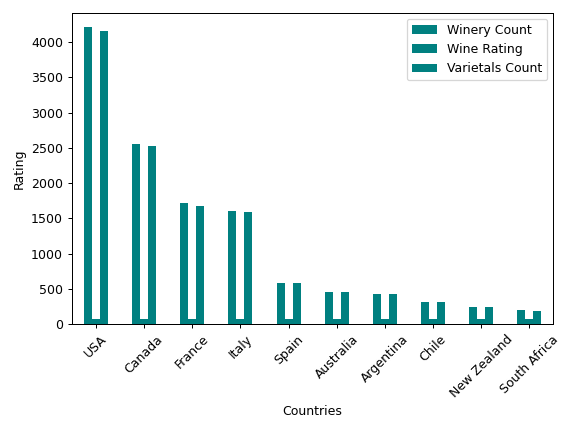

In [24]:
# Plot for Average Wine Rating in Top Ten Countries
top_rat_plot = merge_varietals_df.plot.bar(rot=45, facecolor="teal", align="center")
plt.xlabel('Countries', fontsize=10)
plt.ylabel('Rating', fontsize=10)
plt.tight_layout()
plt.savefig("top_rat_plot.png")


<IPython.core.display.Javascript object>


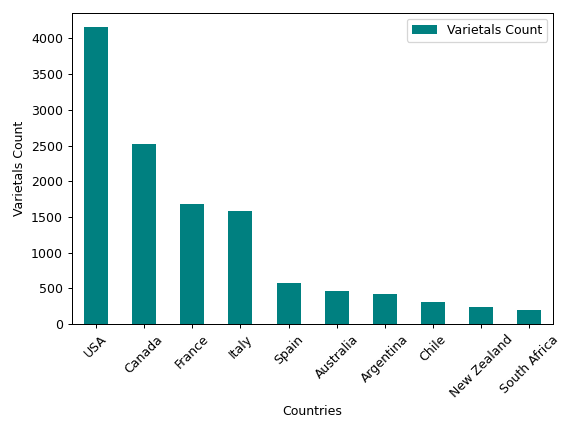

In [20]:
# Plot for Count of Varietals / Blends in the Top Ten Wine Producing Countries
var_plot = top10_varietals_df.plot.bar(rot=45, facecolor="teal", align="center")
plt.xlabel('Countries', fontsize=10)
plt.ylabel('Varietals Count', fontsize=10)
plt.tight_layout()
plt.savefig("var_plot")
 DONT NEED


<IPython.core.display.Javascript object>


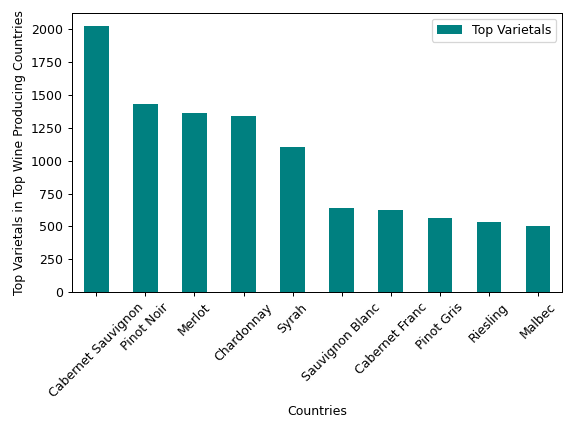

In [21]:

# Plot for Top Ten Varietal Types in the Top Ten Wine Producing Countries
top10_var_plot = top10_varietals_split_df.plot.bar(rot=45, facecolor="teal", align="center")
plt.xlabel('Countries', fontsize=10)
plt.ylabel('Top Varietals in Top Wine Producing Countries', fontsize=10)
plt.tight_layout()
plt.savefig("top10_var_plot")







In [ ]:
# Now make a plot that takes thes top10_var_plot varietals and shows the average rating of that type of varietal. 
# using the cleaned_df you will want to use the calculations below to clean it up further. Mindie said to open cleaned_df
# in excel and clean it up in excel where it will be much easier to clean then pull it back into here and do the calculations below
# using the cab calculation:
# cab = cleaned_df[cleaned_df["Varietal"].astype(str).str.contains("Cabernet Sauvignon",regex=False)]
# make one for each:
# char = cleaned_df[cleaned_df["Varietal"].astype(str).str.contains("Chardonnay",regex=False)]
# mer = cleaned_df[cleaned_df["Varietal"].astype(str).str.contains("Merlot",regex=False)]
# etc..... through the top varietals above.